In [25]:
import pandas as pd
import os
import os.path
import seaborn as sns                                               
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
"""Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов\
(product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, \
где лежит папка с пользователем)"""

'Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов(product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)'

In [27]:
path='/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tonojan/shared/homeworks/python_ds_miniprojects/4/data/'

In [28]:
sales=pd.DataFrame()

In [29]:
for data in os.listdir(path):
    for name in os.listdir(path + data):
        df1=pd.read_csv(path + data+'/'+name+'/data.csv',index_col=0)
        df1['name']= name
        df1['date']= data
        sales=sales.append(df1)

In [30]:
sales.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [33]:
"""Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом \
и в алфавитном порядке."""

'Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.'

In [55]:
quantity_sum=sales.groupby('name') \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity',ascending=False)
quantity_sum.loc[quantity_sum.quantity==quantity_sum.quantity.max()].index

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

In [56]:
"""Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot),где: \
по оси x – идентификаторы товаров (product_id) \
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)"""

'Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot),где: по оси x – идентификаторы товаров (product_id) по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)'

In [62]:
top_10=sales.groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .nlargest(10,'quantity')
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
46,66,13
66,94,13
38,50,12
65,92,12


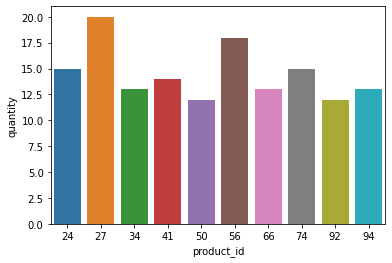

In [65]:
sns.barplot(x='product_id',y='quantity', data=top_10)

In [67]:
"""Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни,   \
по которым у нас есть данные (date)"""

'Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни,   по которым у нас есть данные (date)'

In [75]:
date_sales=sales.groupby('date', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('date')

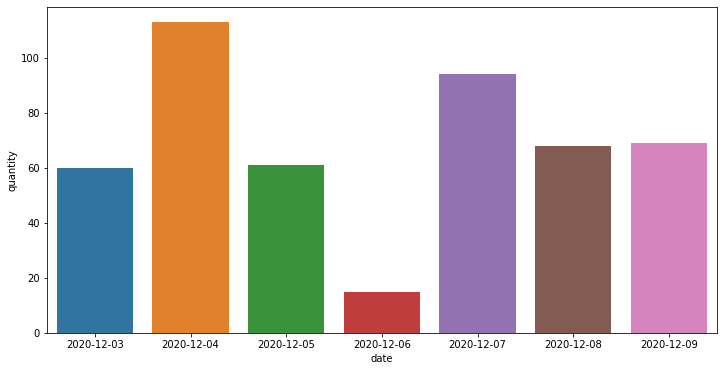

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(x='date',y='quantity', data=date_sales)

In [78]:
"""Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара  \
с одинаковым product_id, совершенную в разные дни.""" 

'Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара  с одинаковым product_id, совершенную в разные дни.'

In [82]:
double_sales=sales.drop_duplicates() \
        .groupby(['name','product_id'], as_index=False) \
        .agg({'date':'nunique'}) \
        .sort_values('date', ascending=False)
double_sales.head()

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
0,Alexey_Fedorov,13,1
109,Petr_Smirnov,21,1
103,Petr_Petrov,64,1
